# THE NETWORK OF THREE ARTICLES OF BRYAN PENPRASE
## Sententially Co-Occurring Topic Modeling Terms 

## By Moses Boudourides 

In [1]:
import os
os.chdir("/Users/mb7881/WorkPlaces/Python Projects 2/CoreColloquiaLearningOutcomes_Fall2019/PenpraseNet")
import wikipedia
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx, community, pygraphviz
np.random.seed(2018)
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from string import punctuation, digits
import nltk
# nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
filename1 = 'penprase1a.txt'
filename2 = 'penprase2a.txt'
filename3 = 'penprase3a.txt'
titlename = "Bryan Penprase"
st = titlename

f1 = codecs.open(filename1, "r", encoding="utf-8").readlines()
f2 = codecs.open(filename2, "r", encoding="utf-8").readlines()
f3 = codecs.open(filename3, "r", encoding="utf-8").readlines()

print type(f1),type(f2),type(f3)

# num_lines = 0
# num_words = 0
# num_chars = 0
# for line in f:
#     words = line.split()
#     num_lines += 1
#     num_words += len(words)
#     num_chars += len(line)
# print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)
# # print "%s has number of words = %i" %(titlename,num_words)
# # blob = TextBlob("\n".join(f))

<type 'list'> <type 'list'> <type 'list'>


In [3]:
text1="\n".join(f1).split("#################################")
# print len(text1),type(text1)
nas=[]
for a in text1:
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for t in text1:
    for x in nas:
        t.replace("x","")
text1=[w.encode('utf8').decode('utf8').encode("ascii","ignore") for w in text1]

text2="\n".join(f2).split("#################################")
# print len(text2),type(text1)
nas=[]
for a in text2:
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for t in text2:
    for x in nas:
        t.replace("x","")
text2=[w.encode('utf8').decode('utf8').encode("ascii","ignore") for w in text2]

text3="\n".join(f3).split("#################################")
# print len(text2),type(text1)
nas=[]
for a in text3:
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for t in text3:
    for x in nas:
        t.replace("x","")
text3=[w.encode('utf8').decode('utf8').encode("ascii","ignore") for w in text3]

text=text1+text2+text3
# print len(text),type(text)
# text

docs_d={}
docs_d["first_article"]=text[0]
docs_d["second_article"]=text[1]
docs_d["third_article"]=text[2]

docs=docs_d.values()
print len(docs)
docs

3


['9. Teaching and Learning Centers and Undergraduate Education\n\n\n\nUndergraduates and teaching should be at the heart of any university, and yet often at the largest institutions, the focus on research, discovery, graduate students, and funding takes center stage. Many faculty are told that a focus on their scholarship will be the best way to get tenure and advance in the institution, and recognition for research within their department and disciplinary communities creates incentives that reinforce this message. The development of a "teaching culture" is often left to informal mentoring by department colleagues, and professors are left to teach themselves the art of teaching without any formal instruction or guidance. The traditional emphasis on graduate students and research is at odds with societal concerns about the value of higher education, and the burgeoning numbers of undergraduate students on research campuses. The total number of students enrolled in US higher education has

### Extraction of Terms from Topic Modeling

In [4]:
excluded = stopwords.words('english') + list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in excluded and not w.isdigit()] #stop_words
 
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print VOCABULARY_SIZE, DOCUMENTS_COUNT  

4078 3


In [5]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [6]:
documents=docs
doc_sample = documents[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['9.', 'Teaching', 'and', 'Learning', 'Centers', 'and', 'Undergraduate', 'Education\n\n\n\nUndergraduates', 'and', 'teaching', 'should', 'be', 'at', 'the', 'heart', 'of', 'any', 'university,', 'and', 'yet', 'often', 'at', 'the', 'largest', 'institutions,', 'the', 'focus', 'on', 'research,', 'discovery,', 'graduate', 'students,', 'and', 'funding', 'takes', 'center', 'stage.', 'Many', 'faculty', 'are', 'told', 'that', 'a', 'focus', 'on', 'their', 'scholarship', 'will', 'be', 'the', 'best', 'way', 'to', 'get', 'tenure', 'and', 'advance', 'in', 'the', 'institution,', 'and', 'recognition', 'for', 'research', 'within', 'their', 'department', 'and', 'disciplinary', 'communities', 'creates', 'incentives', 'that', 'reinforce', 'this', 'message.', 'The', 'development', 'of', 'a', '"teaching', 'culture"', 'is', 'often', 'left', 'to', 'informal', 'mentoring', 'by', 'department', 'colleagues,', 'and', 'professors', 'are', 'left', 'to', 'teach', 'themselves', 'the', 'art', 'of', 

[u'teach', u'learn', u'center', u'undergradu', u'educ', u'undergradu', u'teach', u'heart', u'univers', u'largest', u'institut', u'focu', u'research', u'discoveri', u'graduat', u'student', u'fund', u'take', u'center', u'stage', u'faculti', u'tell', u'focu', u'scholarship', u'best', u'tenur', u'advanc', u'institut', u'recognit', u'research', u'depart', u'disciplinari', u'commun', u'creat', u'incent', u'reinforc', u'messag', u'develop', u'teach', u'cultur', u'leav', u'inform', u'mentor', u'depart', u'colleagu', u'professor', u'leav', u'teach', u'teach', u'formal', u'instruct', u'guidanc', u'tradit', u'emphasi', u'graduat', u'student', u'research', u'odd', u'societ', u'concern', u'valu', u'higher', u'educ', u'burgeon', u'number', u'undergradu', u'student', u'research', u'campus', u'total', u'number', u'student', u'enrol', u'higher', u'educ', u'rise', u'dramat', u'past', u'decad', u'million', u'million', u'proport', u'graduat', u'student', u'higher', u'educ', u'remain', u'constant', u'perio

In [7]:
rd={}
# rd={u"kenni":u"kenny",u"kennedi":u"kennedy",u"jewelri":u"jewelry",u"dolli":u"dolly",u"jerri":u"jerry",
#     u"scari":u"scary",u"academi":u"academi",u"societi":u"society",u"sothebi":u"sotheby",u"beverli":u"beverly",u"lobbi":u"lobby"}

pdocs=[preprocess(doc) for doc in documents]

ppdocs=[]
for s in pdocs:
    for i in range(len(s)):
        for k in rd.keys():  #,v in rd.items():
            if k == s[i]:
                s[i]=rd[k]
    ppdocs.append(s)

# for s in ppdocs:
#     for i in range(len(s)):
#         for k,v in rd.items():
#             if k == s[i]:
#                 print k

In [8]:
# processed_docs = [preprocess(doc) for doc in documents]
# processed_docs[:10]

# excl=[
#     u'say',u'go',u'like',u'didnt',u'tell',u'come',u'want',u'call',u'dont',u'fred',u'girl',u'give',u'good',u'know',u'leav',u'look',u'parti',u'peopl',
#     u'she',u'take',u'talk',u'thing',u'think',u'work',u'ask',u'get',u'great',u'hous',u'lunch',u'mean',u'offic',u'anybodi',u'februari',u'januari',
#     u'place',u'saturday',u'friday',u'sunday',u'right',u'time',u'walk',u'wednesday',u'year',u'theyr',u'thursday',u'tri',u'wasnt',u'pick',u'be',
#     u'her',u'that',u'out',u'ith',u'up',u'one',u'you',u'ell',u'who',u'how',u'monday',u'tuesday',u'everybodi',u'dinner',u'interview',u'larri'
    
    
#     u'andi', u'answer', u'anymor', u'april', u'arriv', u'articl', u'august', u'avenu', u'aw', u'babi', u'barri', u'beauti', u'believ', u'billi',
#     u'birthday', u'black', u'blond', u'blue', u'boat', u'bobbi', u'bodi', u'book', u'boy', u'busi', u'care', u'carri', u'catherin', u'chang', 
#     u'chic', u'chri', u'christma', u'christoph', u'church', u'citi', u'close', u'cloth', u'cold', u'copi', u'corner', u'cost', u'coupl', u'cover',
#     u'crazi', u'cri', u'cute', u'danc', u'debbi', u'decid', u'denni', u'dian', u'doctor', u'dolly', u'earli', u'east', u'eat', u'elev', 
#     u'embarrass', u'english', u'excit', u'eye', u'face', u'fairi', u'famili', u'famou', u'fell', u'felt', u'fifth', u'figur', u'funni', u'galleri',
#     u'georg', u'guy', u'hand', u'happi', u'hard', u'harri', u'hat', u'hate', u'hello', u'help', u'henri', u'high', u'hold', u'holzer', u'home', 
#     u'horribl', u'hospit', u'introduc', u'invit', u'issu', u'jack', u'jacki', u'jam', u'jami', u'juli', u'june', u'keep', u'ladi', u'late', 
#     u'lidija', u'littl', u'liza', u'long', u'lose', u'lot', u'love', u'magazin', u'mako', u'march', u'mari', u'marri', u'mayb', u'mick', u'minut',
#     u'miss', u'montauk', u'movi', u'name', u'nervou', u'news', u'newspap', u'nice', u'night', u'nose', u'note', u'notic', u'novemb', u'number', 
#     u'octob', u'order', u'paloma', u'pari', u'pay', u'photo', u'pictur', u'piec', u'pretti', u'print', u'probabl', u'put', u'queen', u'readi', 
#     u'realiz', u'recogn', u'reinhold', u'restaur', u'ronni', u'ross', u'rubel', u'run', u'scar', u'sell', u'septemb', u'serv', u'sick', u'sign', 
#     u'sing', u'sit', u'sixti', u'somebodi', u'squar', u'stay', u'steal', u'stevi', u'stick', u'stop', u'stori', u'strang', u'stuff', u'suit', 
#     u'suppos', u'sure', u'surpris', u'suzi', u'start', u'tabl', u'halston', u'tap', u'tape', u'terribl', u'thank', u'thirti', u'thoma', u'ticket', 
#     u'till', u'tire', u'toni', u'truman', u'turn', u'type', u'upstair', u'usual', u'voic', u'vreeland', u'wait', u'wake', u'wall', u'wear', u'wed',
#     u'week', u'weekend', u'west', u'white', u'wife', u'wish', u'woman', u'street', u'word', u'world', u'write', u'yoko', u'york',u'paint',u'guess',
#     u'matti',u'larri',u'perski',u'suddenli',u'nutti',u'friendli',u'kitti',u'bianca',u'room',u'cab',
    
#     u"student",u"teach",u"learn"
# ] 

excl=[u"http",u"higher",u"year"]

# starts with u"..."
processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print len(allw)
processed_docs[:10]

2408


[[u'teach',
  u'learn',
  u'center',
  u'undergradu',
  u'educ',
  u'undergradu',
  u'teach',
  u'heart',
  u'univers',
  u'largest',
  u'institut',
  u'focu',
  u'research',
  u'discoveri',
  u'graduat',
  u'student',
  u'fund',
  u'take',
  u'center',
  u'stage',
  u'faculti',
  u'tell',
  u'focu',
  u'scholarship',
  u'best',
  u'tenur',
  u'advanc',
  u'institut',
  u'recognit',
  u'research',
  u'depart',
  u'disciplinari',
  u'commun',
  u'creat',
  u'incent',
  u'reinforc',
  u'messag',
  u'develop',
  u'teach',
  u'cultur',
  u'leav',
  u'inform',
  u'mentor',
  u'depart',
  u'colleagu',
  u'professor',
  u'leav',
  u'teach',
  u'teach',
  u'formal',
  u'instruct',
  u'guidanc',
  u'tradit',
  u'emphasi',
  u'graduat',
  u'student',
  u'research',
  u'odd',
  u'societ',
  u'concern',
  u'valu',
  u'educ',
  u'burgeon',
  u'number',
  u'undergradu',
  u'student',
  u'research',
  u'campus',
  u'total',
  u'number',
  u'student',
  u'enrol',
  u'educ',
  u'rise',
  u'dramat',
  u

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print len(dictionary)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

2408
(508, u'mcdougal')
(1420, u'interchang')
(2117, u'davo')
(2053, u'asian')
(582, u'payoff')
(979, u'authorit')
(250, u'educ')
(1951, u'uitm')
(1485, u'list')
(1130, u'concret')
(484, u'lori')


In [10]:
dictionary.filter_extremes(no_below=2, no_above=2, keep_n=100000) #3 0.7 | 15 0.5
len(dictionary)

873

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [12]:
nt=2 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [13]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      77.683891        1       1  0.052087  0.0
1      22.316111        1       2 -0.052087  0.0, topic_info=    Category        Freq        Term       Total  loglift  logprob
574  Default  169.000000        educ  169.000000  30.0000  30.0000
85   Default   72.000000   technolog   72.000000  29.0000  29.0000
761  Default   48.000000    industri   48.000000  28.0000  28.0000
606  Default   83.000000     develop   83.000000  27.0000  27.0000
852  Default   53.000000  curriculum   53.000000  26.0000  26.0000
772  Default   39.000000       chang   39.000000  25.0000  25.0000
473  Default   36.000000     increas   36.000000  24.0000  24.0000
695  Default   28.000000       world   28.000000  23.0000  23.0000
476  Default   52.000000       enabl   52.000000  22.0000  22.0000
92   Default   21.000000      social   21.000000  21.0000  21.0000
666  Default   22.000000       skill   22.000000  20.0000  20.0000
171  Default   42.000000       onlin   42.000000  19.0000  19.0000
3    Default   18.000000      global   18.000000  18.0000  18.0000
499  Default   15.000000     respons   15.000000  17.0000  17.0000
118  Default   29.000000       liber   29.000000  16.0000  16.0000
491  Default   30.000000         art   30.000000  15.0000  15.0000
612  Default   16.000000      econom   16.000000  14.0000  14.0000
492  Default   34.000000       human   34.000000  13.0000  13.0000
271  Default   16.000000     societi   16.000000  12.0000  12.0000
741  Default   17.000000       power   17.000000  11.0000  11.0000
846  Default   15.000000       futur   15.000000  10.0000  10.0000
119  Default   71.000000     univers   71.000000   9.0000   9.0000
475  Default   22.000000      requir   22.000000   8.0000   8.0000
405  Default   21.000000     environ   21.000000   7.0000   7.0000
187  Default   19.000000     product   19.000000   6.0000   6.0000
869  Default   23.000000       train   23.000000   5.0000   5.0000
393  Default   34.000000        need   34.000000   4.0000   4.0000
511  Default   18.000000       state   18.000000   3.0000   3.0000
83   Default   19.000000       shift   19.000000   2.0000   2.0000
61   Default   39.000000      biolog   39.000000   1.0000   1.0000
..       ...         ...         ...         ...      ...      ...
772   Topic2   21.511288       chang   39.640648   0.8886  -4.7217
473   Topic2   18.464649     increas   36.131561   0.8286  -4.8744
574   Topic2   60.759083        educ  169.245148   0.4754  -3.6834
852   Topic2   23.924076  curriculum   53.581192   0.6935  -4.6154
187   Topic2   10.650325     product   19.829456   0.8783  -5.4247
606   Topic2   31.835588     develop   83.081329   0.5406  -4.3297
542   Topic2    7.764504     acceler   13.476473   0.9485  -5.7407
719   Topic2    6.540005      growth   10.752701   1.0026  -5.9124
511   Topic2    9.930303       state   18.948574   0.8537  -5.4947
405   Topic2   10.900099     environ   21.694431   0.8116  -5.4015
118   Topic2   13.046892       liber   29.054817   0.6992  -5.2218
475   Topic2   11.006689      requir   22.628510   0.7792  -5.3918
476   Topic2   18.881863       enabl   52.131790   0.4843  -4.8521
491   Topic2   13.198565         art   30.928303   0.6483  -5.2102
171   Topic2   15.915412       onlin   42.012531   0.5292  -5.0230
869   Topic2   11.014760       train   23.571125   0.7391  -5.3911
83    Topic2    9.967359       shift   19.888680   0.8090  -5.4910
633   Topic2   37.881725     student  295.746918  -0.5552  -4.1558
492   Topic2   13.107312       human   34.709488   0.5260  -5.2171
119   Topic2   17.146418     univers   71.148636   0.0769  -4.9485
173   Topic2   22.782810       cours  149.898590  -0.3841  -4.6643
605   Topic2   18.251669      scienc  141.801666  -0.5503  -4.8860
393   Topic2   11.876438        need   34.816223   0.4243  -5.3158
374   Topic2   13.066646      provid   53.579384   0.0888  -5.2202
61    Top

In [14]:
# nt=1 #number_of_topics
# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [15]:
topics = lda_model.print_topics(num_words=50)

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
import re
for s in lt:
    for ss in s:
        if re.sub(r'[^a-zA-Z]','', ss) not in terms:
            terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=sorted(terms)
print len(terms)
terms

79


[u'activ',
 u'approach',
 u'art',
 u'assess',
 u'base',
 u'biolog',
 u'build',
 u'campu',
 u'center',
 u'chang',
 u'class',
 u'colleg',
 u'cours',
 u'creat',
 u'cultur',
 u'curriculum',
 u'depart',
 u'describ',
 u'design',
 u'develop',
 u'discuss',
 u'econom',
 u'educ',
 u'effect',
 u'enabl',
 u'engin',
 u'environ',
 u'exampl',
 u'experi',
 u'faculti',
 u'form',
 u'futur',
 u'global',
 u'graduat',
 u'group',
 u'harvard',
 u'help',
 u'human',
 u'impact',
 u'includ',
 u'increas',
 u'industri',
 u'institut',
 u'integr',
 u'learn',
 u'liber',
 u'need',
 u'onlin',
 u'physic',
 u'power',
 u'product',
 u'professor',
 u'program',
 u'provid',
 u'requir',
 u'research',
 u'respons',
 u'result',
 u'scienc',
 u'shift',
 u'skill',
 u'small',
 u'social',
 u'societi',
 u'staff',
 u'stanford',
 u'state',
 u'stem',
 u'student',
 u'studi',
 u'teach',
 u'technolog',
 u'train',
 u'undergradu',
 u'unit',
 u'univers',
 u'work',
 u'world',
 u'yale']

In [16]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu)
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"teach" + 0.031*"student" + 0.023*"learn" + 0.015*"cours" + 0.015*"faculti" + 0.015*"scienc" + 0.014*"center" + 0.013*"educ" + 0.012*"yale" + 0.010*"class"
Topic: 1 
Words: 0.025*"educ" + 0.016*"technolog" + 0.016*"student" + 0.015*"industri" + 0.013*"develop" + 0.010*"curriculum" + 0.009*"cours" + 0.009*"chang" + 0.008*"enabl" + 0.008*"increas"


In [17]:
# # plt.figure(figsize=(15,2.5*15*((nt+1)/4))); #15
# # for i in range(nt):
# #     sns.set(font_scale = 1.5)
# #     df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
# #     plt.subplot(nt+1,2,i+1); #5
# #     plt.title('topic÷ '+str(i+1));
# #     sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
# #     plt.xlabel('probability');
# plt.figure(figsize=(15,15)) #2.5*15*((nt+1)/4))); #15
# # sns.set(font_scale = 1.5)
# df0=pd.DataFrame(sss[0], columns=['term','prob']).set_index('term')
# df1=pd.DataFrame(sss[1], columns=['term','prob']).set_index('term')
# # plt.subplot(1,2,1); #5
# plt.title('topic÷ '+str(1));
# sns.barplot(x='prob', y=df0.index, data=df0, label='Cities', palette='spring');
# plt.xlabel('probability');
# # plt.subplot(1,2,2); #5
# # plt.title('topic÷ '+str(2));
# # sns.barplot(x='prob', y=df1.index, data=df1, label='Cities', palette='spring');
# # plt.xlabel('probability');
# sst="Topic Modeling (TM) of three articles of %s" %st
# plt.suptitle(sst,fontsize=25, y=0.90);
# plt.show()

In [18]:
# from pyLDAvis import gensim as pgensim
# vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
# vis

In [19]:
ted={}
for k,v in docs_d.items():
    t=[]
    for w in terms: 
        if w in v:
            if w not in t:
                t.append(w)
    ted[k]=sorted(t)
print len(ted)
for k,v in ted.items():
    print k,v

3
second_article [u'activ', u'approach', u'art', u'assess', u'base', u'biolog', u'build', u'campu', u'center', u'chang', u'class', u'colleg', u'cours', u'creat', u'cultur', u'curriculum', u'depart', u'describ', u'design', u'develop', u'discuss', u'educ', u'effect', u'enabl', u'engin', u'environ', u'exampl', u'experi', u'form', u'futur', u'graduat', u'group', u'help', u'human', u'impact', u'includ', u'increas', u'institut', u'integr', u'learn', u'liber', u'need', u'onlin', u'physic', u'power', u'product', u'professor', u'program', u'provid', u'research', u'respons', u'result', u'scienc', u'shift', u'small', u'staff', u'state', u'stem', u'student', u'studi', u'teach', u'technolog', u'train', u'undergradu', u'unit', u'univers', u'work', u'world']
first_article [u'activ', u'approach', u'art', u'assess', u'base', u'biolog', u'build', u'campu', u'center', u'chang', u'class', u'colleg', u'cours', u'creat', u'cultur', u'curriculum', u'depart', u'describ', u'design', u'develop', u'discuss', u'e

In [20]:
freq=[]
for k in terms: 
    s=0
    for kk,v in docs_d.items():
        v=v.lower()
        s+=v.count(k)
    freq.append(s)
trf_df = pd.DataFrame(
    {'Term': terms, 
     'Frequency of Occurrences': freq
    })
trf_df=trf_df[['Term','Frequency of Occurrences']]
trf_df=trf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
print len(trf_df)
trf_df

79


,Term,Frequency of Occurrences
68,student,318
70,teach,301
44,learn,220
22,educ,198
12,cours,166
2,art,160
58,scienc,156
10,class,133
8,center,129
76,work,118


In [21]:
# terms=[]
# for i in range(nt):
#     print list(lda_model.show_topic(i))
#     for t in list(lda_model.show_topic(i)):
#         term=t[0]
#         if term not in terms:
#             terms.append(term)
#     print
# terms=sorted(terms)
# print len(terms)
# terms

In [22]:
# dterms=dictionary.values()
# len(dterms)

In [23]:
# trf_df.to_csv('terms_freqs.csv')

In [24]:
# rem=[u'be',u'her',u'that',u'out',u'ith',u'up',u'one',u'you',u'ell',u'who',u'how']

In [25]:
tterms=list(set(terms+trf_df['Term'].tolist()[:50]))
print len(tterms)
# sorted(tterms)

79


In [26]:
# Among the 90 above terms, collect the "useless/meaningless" ones so that the remaining are at least 60-70.
# Add the removed terms in the list "excl" and run everything again!

### The graph of co-occurrent TM terms

In [27]:
medges=[]
for k,v in docs_d.items():
    sent_text = nltk.sent_tokenize(v)
    for sent in sent_text:
        for j in itertools.combinations(tterms, 2):
            if j[0] in sent and j[1] in sent:
                medges.append((j[0],j[1],k))
print len(medges),len(set(medges))
medges

9894 3762


[(u'art', u'graduat', 'second_article'),
 (u'art', u'research', 'second_article'),
 (u'art', u'univers', 'second_article'),
 (u'art', u'student', 'second_article'),
 (u'art', u'teach', 'second_article'),
 (u'art', u'center', 'second_article'),
 (u'art', u'institut', 'second_article'),
 (u'graduat', u'research', 'second_article'),
 (u'graduat', u'univers', 'second_article'),
 (u'graduat', u'student', 'second_article'),
 (u'graduat', u'teach', 'second_article'),
 (u'graduat', u'center', 'second_article'),
 (u'graduat', u'institut', 'second_article'),
 (u'research', u'univers', 'second_article'),
 (u'research', u'student', 'second_article'),
 (u'research', u'teach', 'second_article'),
 (u'research', u'center', 'second_article'),
 (u'research', u'institut', 'second_article'),
 (u'univers', u'student', 'second_article'),
 (u'univers', u'teach', 'second_article'),
 (u'univers', u'center', 'second_article'),
 (u'univers', u'institut', 'second_article'),
 (u'student', u'teach', 'second_article

77 2254


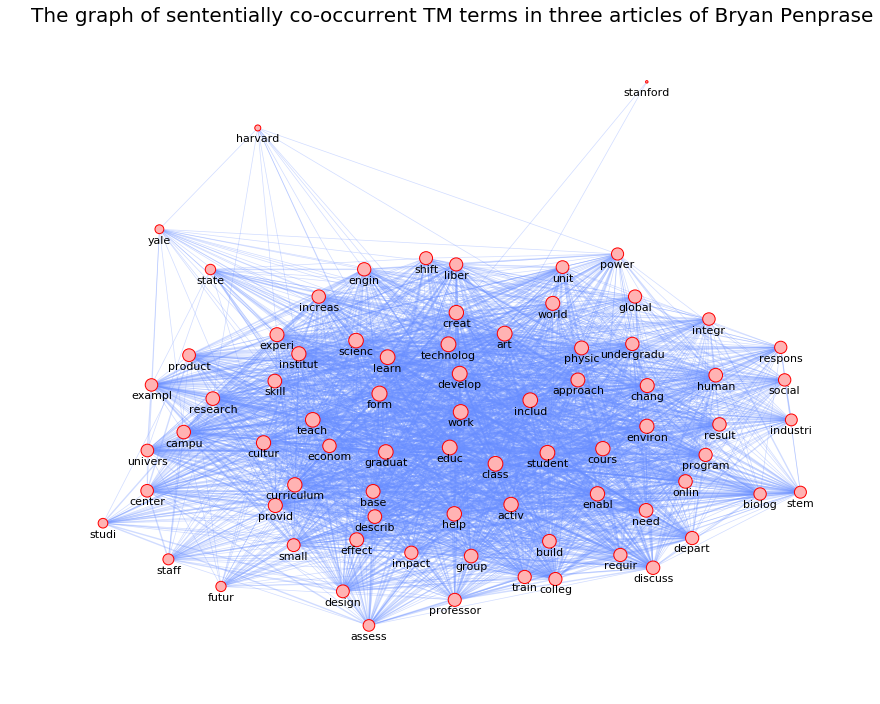

In [28]:
G = nx.MultiGraph()
G.add_edges_from(medges)
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)
# Gw.remove_node("cours")
print len(Gw.nodes()), len(Gw.edges())

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
# edge_width=[math.log(1+w) for w in edge_width]
edge_width=[0.7*w for w in edge_width] 

nsi=[3*Gw.degree(n) for n in Gw.nodes()]
figsize=(15,12)
pos=graphviz_layout(Gw) 
# print pos["econom"]
pos["econom"]=(75, 85) #(73.681, 91.158)

node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,width=edge_width,alpha=0.3)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -4 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=11);
sst="The graph of sententially co-occurrent TM terms in three articles of %s" %st
plt.title(sst,fontsize=20);
plt.margins(x=0.1, y=0.1) 

In [29]:
partition = community.best_partition(Gw)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, Gw, weight='weight')
print "The graph of sententially co-occurring terms in the three articles of", st,  "has", kk, 'communities and modularity coefficient equal to', modularity
print

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    print
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The graph of sententially co-occurring terms in the three articles of Bryan Penprase has 4 communities and modularity coefficient equal to 0.0485625512802

Community 0 with 24 nodes: [u'graduat', u'undergradu', u'impact', u'group', u'univers', u'activ', u'increas', u'educ', u'provid', u'learn', u'cultur', u'result', u'need', u'onlin', u'research', u'state', u'exampl', u'experi', u'effect', u'colleg', u'student', u'shift', u'chang', u'campu']

Community 1 with 22 nodes: [u'global', u'human', u'skill', u'describ', u'build', u'curriculum', u'discuss', u'requir', u'enabl', u'integr', u'creat', u'biolog', u'respons', u'develop', u'econom', u'futur', u'approach', u'product', u'stem', u'industri', u'environ', u'social']

Community 2 with 18 nodes: [u'depart', u'help', u'assess', u'staff', u'class', u'program', u'includ', u'form', u'train', u'studi', u'work', u'design', u'scienc', u'cours', u'base', u'physic', u'center', u'professor']

Community 3 with 13 nodes: [u'unit', u'liber', u'world', u

In [30]:
pos0=nx.circular_layout(nx.cycle_graph(kk))

ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for p,q in list(eocmd):
    if p==0:
        c1=list(list(q)[0])
    if p==1:
        c2=list(list(q)[0])
    if p==2:
        c3=list(list(q)[0])
    if p==3:
        c4=list(list(q)[0])
#     if p==4:
#         c5=list(list(q)[0])

G1=Gw.subgraph(c1)
pos1=nx.circular_layout(G1) #.spring_layout(G1,1.)

G2=Gw.subgraph(c2)
pos2=nx.circular_layout(G2) #.spring_layout(G2,1.)

G3=Gw.subgraph(c3)
pos3=nx.circular_layout(G3) #.spring_layout(G3,1.)

G4=Gw.subgraph(c4)
pos4=nx.circular_layout(G4) #.spring_layout(G4,1.)

# G5=Gw.subgraph(c5)
# pos5=nx.circular_layout(G5) #.spring_layout(G4,1.)

# GR=G.subgraph(npR)
# posR=nx.spring_layout(GR,1.)

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

centers=pos0.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in centers[i]:
        t.append(3*j)  
    centerm.append(np.array(t))
centers=centerm

# radius=0.05 #1.5
pos1=re_pos(pos1,centers[0],1)  
pos2=re_pos(pos2,centers[1],1)    
pos3=re_pos(pos3,centers[2],1) 
pos4=re_pos(pos4,centers[3],1)
# pos5=re_pos(pos5,centers[4],0.02)
# posR=re_pos(posR,centers[4],radius)

# posAll=dict(pos1.items()+pos2.items()+[(k,pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]) for k in set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+pos5.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+pos5[k]) for k in set(pos5)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+posR.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+posR[k]) for k in set(posR)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

In [31]:
def ccompl(G):
    n=len(G.nodes())
    m=len(G.edges())
    if m==n*(n-1)/2.:
        return "complete"
    else:
        r=nx.density(G)
        return r

Community 0 has density equal to 0.942
Community 1 has density equal to 0.870
Community 2 has density equal to 0.941
Community 3 has density equal to 0.756


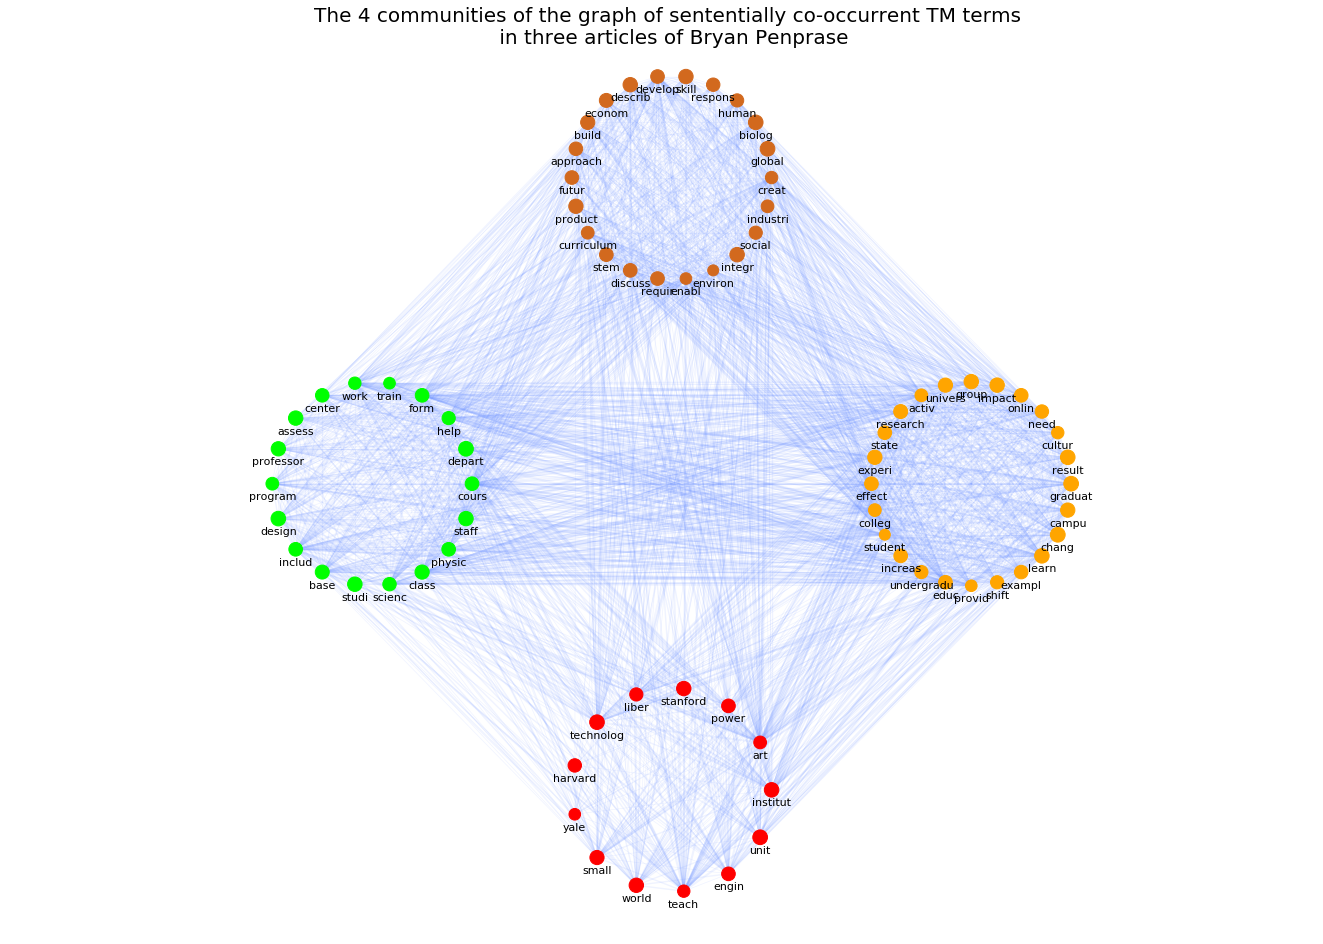

In [32]:
GG=[G1,G2,G3,G4]
for g in GG:
    if ccompl(g)=="complete":
        print "Community %i is a %i-clique" %(GG.index(g),len(g))
    else:
        r=ccompl(g)
        print "Community %i has density equal to %.3f" %(GG.index(g),r)

plt.figure(figsize=(23,16))

# pos2['Seven Wonders of the Invisible World']=(-1.4,1.4)
# posAll['Seven Wonders of the Invisible World']=(-1.4,1.4)

# labels={}
# for i in CGwi.nodes():
#     labels[i]=i #''

# edge_width=[0.7*w for w in edge_width] 
# nsi=[3*Gw.degree(n) for n in Gw.nodes()]
# nodes = nx.draw_networkx_nodes(CGwi, pos, node_color=node_color,node_size=nsi,node_shape="s")
nx.draw_networkx_nodes(G1,pos=pos1,node_size=nsi,nodelist=c1,node_color='orange',alpha=1.); #purple
nx.draw_networkx_nodes(G2,pos=pos2,node_size=nsi,nodelist=c2,node_color='chocolate',alpha=1.);
nx.draw_networkx_nodes(G3,pos=pos3,node_size=nsi,nodelist=c3,node_color='lime',alpha=1.);
nx.draw_networkx_nodes(G4,pos=pos4,node_size=nsi,nodelist=c4,node_color='red',alpha=1.);
# nx.draw_networkx_nodes(G5,pos=pos5,node_size=nsi,nodelist=c5,node_color='magenta',alpha=1.);
# nx.draw_networkx_nodes(GR,pos=posR,node_size=node_size,nodelist=npR,node_color='yellow',alpha=1.);
# nx.draw_networkx_nodes(G12,pos=pos12,node_size=dict(G.in_degree()).values(),nodelist=np12,node_color='orange',alpha=1.);
# nx.draw_networkx_nodes(G13,pos=pos13,node_size=dict(G.in_degree()).values(),nodelist=np13,node_color='violet',alpha=1.);
# nx.draw_networkx_nodes(G23,pos=pos23,node_size=node_size,nodelist=np23,node_color='crimson',alpha=1.);    
# nx.draw_networkx_nodes(G123,pos=pos123,node_size=150,nodelist=np123,node_color='yellow',alpha=1.);    
# nx.draw_networkx_nodes(G7,pos=pos7,node_size=500,nodelist=cmms[7],node_color=ppartition7.values(),font_size=20,alpha=1.);

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, posAll, edge_color=edge_color,width=edge_width,alpha=0.1)
# nx.draw_networkx_labels(CGwi,posAll,labels=labels,font_size=13); 

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);



plt.axis('off');
yoffset = {}
y_off = -0.13 # offset on the y axis
for k, v in posAll.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset, font_size=11);
sst="The %i communities of the graph of sententially co-occurrent TM terms \n in three articles of %s" %(kk,st)
plt.title(sst,fontsize=20);
plt.margins(x=0.3, y=0.03) 